# Final Project: Pembelajaran Mesin 1
**Analisis Karakteristik Siswa untuk Prediksi Kelulusan (Klasifikasi)**
[cite_start]**Institusi:** Universitas Darussalam Gontor [cite: 5]

 ## 1. Inisialisasi dan Instalasi Library
Langkah pertama adalah memastikan pustaka `ucimlrepo` terpasang untuk mengakses data secara langsung dari UCI Machine Learning Repository.

In [19]:
!pip install ucimlrepo

## 2. Deskripsi Dataset 
Dataset yang digunakan adalah **Student Performance Dataset**.Data ini mencakup informasi mengenai individu siswa, pelanggan pendidikan, dan wilayah tertentu di Portugal.Atribut mencakup karakteristik numerik dan kategorikal seperti hubungan sosial, latar belakang keluarga, dan perilaku konsumsi.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fetch dataset 
student_performance = fetch_ucirepo(id=320) 
X = student_performance.data.features 
y = student_performance.data.targets 

# Menggabungkan fitur dan target untuk analisis awal
df = pd.concat([X, y], axis=1)
print(f"Dataset berhasil dimuat. Total sampel: {len(df)}")

Dataset berhasil dimuat. Total sampel: 649


## 3. Perumusan Masalah
Pihak manajemen sekolah ingin memanfaatkan data untuk mengidentifikasi siswa yang berisiko gagal. 
**Target:** Nilai ujian akhir (`G3`) dikonversi menjadi label biner: **Lulus (1)** jika nilai $\ge 10$ dan **Gagal (0)** jika $< 10$.
**Justifikasi:** Kami menghapus fitur `G1` dan `G2` (nilai antara) untuk menghindari *data leakage*, sehingga model benar-benar belajar dari perilaku dan latar belakang siswa.

In [21]:
# Mendefinisikan target kelulusan
df['status'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Menghapus kolom nilai mentah agar model fokus pada faktor perilaku [cite: 14]
df_model = df.drop(['G1', 'G2', 'G3'], axis=1)

# Encoding data kategorikal
le = LabelEncoder()
for col in df_model.select_dtypes(include=['object']).columns:
    df_model[col] = le.fit_transform(df_model[col])

print("Data preprocessing selesai.")

Data preprocessing selesai.


## 4. Pendekatan Machine Learning 
Berdasarkan tujuan analisis untuk pengambilan keputusan diskrit (Lulus/Gagal), pendekatan yang dipilih adalah **Klasifikasi**. 
**Model:** Random Forest dipilih karena ketepatannya dalam menangani data campuran (kategorikal/numerik) serta memberikan konsistensi logika yang baik.

In [22]:
X_final = df_model.drop('status', axis=1)
y_final = df_model['status']

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 5. Evaluasi dan Justifikasi 
Penilaian tidak hanya didasarkan pada akurasi, tetapi pada pemahaman konsep.Kami menggunakan *Feature Importance* untuk memberikan justifikasi ilmiah mengenai faktor apa yang paling mempengaruhi kelulusan.

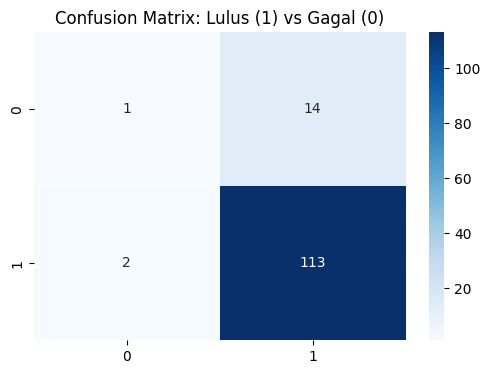

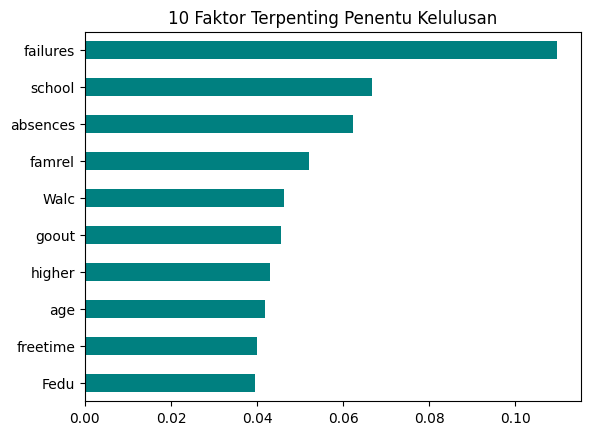

In [23]:
y_pred = model.predict(X_test)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Lulus (1) vs Gagal (0)')
plt.show()

# Feature Importance
importances = pd.Series(model.feature_importances_, index=X_final.columns)
importances.nlargest(10).sort_values().plot(kind='barh', color='teal')
plt.title('10 Faktor Terpenting Penentu Kelulusan')
plt.show()

##  6. Kesimpulan 
Melalui alur berpikir logis ini, model klasifikasi membuktikan bahwa atribut perilaku siswa dapat digunakan untuk memprediksi kelulusan. Pendekatan lain seperti Regresi atau Clustering tidak dipilih karena fokus utama adalah klasifikasi status kelulusan untuk kebijakan sekolah.